In [1]:
import nltk
import re
import pymorphy2
from collections import Counter
nltk.download('stopwords')
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from IPython.core.display import HTML, display

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\User\AppData\Local\Temp\ipykernel_20140\2099189566.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [2]:
train_df = pd.read_csv("train.csv")

train_df.head()

,id,url,title,target
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",False
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,False
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,False
3,3,colorbox.spb.ru,Не Беси Меня Картинки,False
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,False


In [3]:
test_df = pd.read_csv("test.csv")

test_df.head()

,id,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


In [4]:
len(test_df)

165378

In [5]:
train_df["target"].value_counts()

target
False    118594
True      16715
Name: count, dtype: int64

In [6]:
from sklearn.metrics import f1_score

In [7]:
X_train = train_df["title"].values
X_test = test_df["title"].values
y_train = train_df["target"].astype(int).values

# Data preprocessing

In [483]:
TOKEN_PATTERN = "[a-zа-яё!?]+"

def tokenize(text):
    return re.findall(TOKEN_PATTERN, text.lower())

docs = [tokenize(str(text)) for text in X_train]

In [9]:
occurence = Counter([token for doc in docs for token in doc])
occurence

Counter({'экс': 44,
         'министр': 11,
         'экономики': 38,
         'молдовы': 15,
         'главе': 8,
         'мидэи': 1,
         'цель': 39,
         'которого': 23,
         'сделать': 235,
         'из': 3711,
         'республики': 111,
         'не': 2282,
         'просителя': 1,
         'а': 1692,
         'донора': 1,
         'надо': 80,
         'избегать': 4,
         'долгого': 2,
         'нахождения': 4,
         'н': 998,
         'эта': 33,
         'песня': 111,
         'стала': 51,
         'известна': 6,
         'многим': 1,
         'телезрителям': 1,
         'благодаря': 10,
         'сериалу': 5,
         'диверсант': 2,
         'банши': 3,
         'сезон': 1014,
         'серия': 1096,
         'бремя': 5,
         'красоты': 169,
         'смотреть': 5542,
         'онлайн': 11969,
         'беси': 1,
         'меня': 216,
         'картинки': 549,
         'в': 38391,
         'новомосковске': 3,
         'сыграют': 3,
         'следж': 1,


In [10]:
stopwords = nltk.corpus.stopwords.words('russian') + nltk.corpus.stopwords.words('english')
stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [11]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [12]:
lemmatizer_cache = {}

def lemmatize(token):
    if lemmatizer.word_is_known(token):
        if token not in lemmatizer_cache:
            lemmatizer_cache[token] = lemmatizer.parse(token)[0].normal_form
        return lemmatizer_cache[token]
    return token

lemmatized_docs = [[lemmatize(token) for token in text] for text in tqdm_notebook(docs)]

cleared_docs = [[token for token in text if token not in stopwords] for text in lemmatized_docs]

C:\Users\User\AppData\Local\Temp\ipykernel_20140\3197588311.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  lemmatized_docs = [[lemmatize(token) for token in text] for text in tqdm_notebook(docs)]


  0%|          | 0/135309 [00:00<?, ?it/s]

In [13]:
cooccurence = Counter([(doc[i], doc[i + 1]) for doc in docs for i in range(len(doc) - 1)])

In [14]:
cooccurence.most_common(20)

[(('mail', 'ru'), 6701),
 (('смотреть', 'онлайн'), 3820),
 (('поиск', 'mail'), 3502),
 (('результатов', 'поиск'), 2622),
 (('купить', 'в'), 2107),
 (('скачать', 'бесплатно'), 2012),
 (('онлайн', 'бесплатно'), 1957),
 (('читать', 'онлайн'), 1808),
 (('в', 'хорошем'), 1629),
 (('тыс', 'результатов'), 1611),
 (('порно', 'видео'), 1529),
 (('в', 'интернет'), 1529),
 (('в', 'москве'), 1489),
 (('интернет', 'магазине'), 1419),
 (('интернет', 'магазин'), 1377),
 (('хорошем', 'качестве'), 1361),
 (('бесплатно', 'в'), 1315),
 (('на', 'olx'), 1289),
 (('мой', 'мир'), 1123),
 (('мир', 'mail'), 1054)]

In [15]:
cleared_docs_sentence = [' '.join(text) for text in cleared_docs]

In [16]:
d = {'title': cleared_docs_sentence, 'target': y_train}

In [17]:
train_dataset = pd.DataFrame(data=d)
train_dataset

,title,target
0,экс министр экономика молдова глава мидэи цель...,0
1,песня стать известный многий телезритель благо...,0
2,банши сезон серия бремя красота смотреть онлайн,0
3,бесить картинка,0
4,новомосковск сыграть следж хоккеист алексински...,0
...,...,...
135304,пора тюльпан турецкий сериал русский язык резу...,0
135305,остросюжетный сериал шеф игра повышение серия,0
135306,plymouth special deluxe hot rod automatic smal...,0
135307,купить skin сыворотка питательный power formul...,0


In [732]:
SEED = 42
df_train, df_val = train_test_split(train_dataset, test_size=0.3, random_state=SEED)

In [733]:
df_train

,title,target,have bad words,list of bad words
120021,новое советский фильм год список смотреть скач...,0,False,
60781,праздник сентябрь год венесуэла,0,False,
126864,фитнес клуб бассейн метро проспект вернадский ...,0,False,
12117,детский деревянный кухня ecotoys tk аксессуар ...,0,False,
73303,необычный сексуальный традиция мужчина женщина...,0,False,
...,...,...,...,...
110268,смотреть бритый вагин фото,1,False,
119879,продать трехкомнатную вторичку мкр олимпийский...,0,False,
103694,sharp dg купить минск k,0,False,
131932,купить web камера logitech conferencecam rally...,0,False,


In [734]:
df_val

,title,target,have bad words,list of bad words
54589,сериал качели беларусь весь серия смотреть онл...,0,False,
41071,шкаф спальный гарнитур энрике рубль грозный ан...,0,False,
19161,swat close quarters battle русификатор zone ga...,0,False,
75429,читать онлайн электронный книга прометей жизнь...,0,False,
121091,научить щедрость собственный мужчина отучить м...,0,False,
...,...,...,...,...
11385,классификация отказ,0,False,
133567,ответ mail ru страшный сестра норма счита,0,False,
116900,spu,0,False,
45476,разлучка пильный рамка иллюстрация,0,False,


# ML CountVectorizer

In [744]:
count_model = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            lowercase=True, ngram_range=(1, 4), token_pattern=TOKEN_PATTERN,
            stop_words=stopwords, min_df=2, max_df=0.5
        )
    ),
    ('clf', SGDClassifier(random_state=SEED, loss='log_loss', class_weight='balanced'))
])

In [753]:
x_train = df_train['title'].values
y_train = df_train['target'].values

In [754]:
x_val = df_val['title'].values
y_val = df_val['target'].values

In [755]:
count_model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.5, min_df=2, ngram_range=(1, 4),
                                 stop_words=['и', 'в', 'во', 'не', 'что', 'он',
                                             'на', 'я', 'с', 'со', 'как', 'а',
                                             'то', 'все', 'она', 'так', 'его',
                                             'но', 'да', 'ты', 'к', 'у', 'же',
                                             'вы', 'за', 'бы', 'по', 'только',
                                             'ее', 'мне', ...],
                                 token_pattern='[a-zа-яё!?]+')),
                ('clf',
                 SGDClassifier(class_weight='balanced', loss='log_loss',
                               random_state=42))])

In [756]:
f1_score(y_train, count_model.predict(x_train))

0.9656887973923486

In [757]:
f1_score(y_val, count_model.predict(x_val))

0.9482184314121329

In [758]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [759]:
y_predict = cross_val_predict(count_model, x_train, y_train,
                                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED),
                                          method='predict')

In [760]:
f1_score(y_train, y_predict)

0.9462225691733888

In [761]:
y_val_predict = cross_val_predict(count_model, x_val, y_val,
                                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED),
                                          method='predict')

In [762]:
f1_score(y_val, y_val_predict)

0.942622118411699

### Submit

In [102]:
X_test_vectorized = vectorizer.transform(X_test)

test_df["target"] = model.predict(X_test_vectorized).astype(bool)

test_df[["id", "target"]].to_csv("ml_baseline.csv", index=False)

!cat ml_baseline.csv | head

NameError: name 'vectorizer' is not defined

## Adding features

In [292]:
def create_vocabulary(corpus):
    vocabulary = set()
    for text in corpus:
        words = {word for word in text.split()}
        vocabulary.update(words)
    return vocabulary


In [293]:
train_false = train_dataset[train_dataset['target'] == False].title.values
words_in_false = create_vocabulary(train_false)
words_in_false

{'горбачёв',
 'киже',
 'проём',
 'mjet',
 'страничный',
 'ау',
 'барсук',
 'stand',
 'hear',
 'шенеун',
 'креймер',
 'кинески',
 'давыденков',
 'гидрозатвором',
 'gazeta',
 'дерунов',
 'подсчёт',
 'приключенческий',
 'shoumikigen',
 'узбекистанец',
 'ventoni',
 'хетчбэк',
 'kwh',
 'август',
 'gauche',
 'autoshop',
 'пацан',
 'отсюда',
 'босова',
 'сурнина',
 'society',
 'infostart',
 'сосна',
 'rov',
 'jeremih',
 'зарплата',
 'mccoys',
 'flystand',
 'cadou',
 'preparу',
 'микроавтобус',
 'goovis',
 'nitownice',
 'jack',
 'бестрансформаторный',
 'рауэл',
 'vsedelkin',
 'выдавать',
 'vusalim',
 'мутлист',
 'bendra',
 'материалдары',
 'ловко',
 'гаврилов',
 'уленьки',
 'compilation',
 'ароматный',
 'поединок',
 'бвваул',
 'эциклопедии',
 'безуглов',
 'автозаправка',
 'стрелялки',
 'osztбlyok',
 'рассеянный',
 'marca',
 'rebel',
 'протеин',
 'пеун',
 'бэлио',
 'tingo',
 'corner',
 'винить',
 'видеоняня',
 'штепа',
 'приятный',
 'bearbrick',
 'inbox',
 'обсуждение',
 'костин',
 'ржака',
 'п

In [294]:
train_true = train_dataset[train_dataset['target'] == True].title.values
words_in_true = create_vocabulary(train_true)
words_in_true

{'nacktbilder',
 'вge',
 'кавалер',
 'зайчик',
 'corded',
 'denial',
 'marinas',
 'проём',
 'never',
 'крупно',
 'kesha',
 'eropixel',
 'tubetria',
 'pi',
 'kad',
 'laura',
 'lei',
 'solana',
 'erin',
 'книжный',
 'ad',
 'gazeta',
 'tali',
 'died',
 'август',
 'september',
 'пацан',
 'society',
 'зарплата',
 'groom',
 'judith',
 'гусев',
 'jack',
 'тюрьма',
 'australian',
 'newmfx',
 'damily',
 'ловко',
 'blondine',
 'corporaci',
 'compilation',
 'ароматный',
 'sartre',
 'bellz',
 'clip',
 'masturbates',
 'мило',
 'rebel',
 'kelsey',
 'colors',
 'molly',
 'геймерш',
 'lifted',
 'sexs',
 'якут',
 'breeze',
 'sample',
 'spent',
 'приятный',
 'обсуждение',
 'меленький',
 'tomona',
 'forwarder',
 'покупатель',
 'stuckitin',
 'нефтеюганск',
 'keski',
 'вывезти',
 'wax',
 'spermabomben',
 'vera',
 'smitha',
 'bangalore',
 'fell',
 'daniels',
 'still',
 'уходить',
 'faye',
 'deserves',
 'fashioned',
 'pornoпорно',
 'перископ',
 'twos',
 'ult',
 'pornoile',
 'klein',
 'stefany',
 'раб',
 'naka

In [295]:
bad_words = words_in_true.difference(words_in_false)
bad_words

{'nacktbilder',
 'вge',
 'marinas',
 'corded',
 'denial',
 'caera',
 'lustomic',
 'entkleidet',
 'тусовщицы',
 'крупно',
 'kesha',
 'eropixel',
 'tubetria',
 'lei',
 'solana',
 'openload',
 'erin',
 'lateinisch',
 'tali',
 'marcela',
 'tastes',
 'disenchantment',
 'groom',
 'pornstar',
 'alberto',
 'newmfx',
 'introduces',
 'schaut',
 'blindfold',
 'damily',
 'blondine',
 'corporaci',
 'czechtoilets',
 'ненка',
 'sartre',
 'aris',
 'bellz',
 'evelin',
 'pajama',
 'masturbates',
 'мило',
 'фитоняшки',
 'tgp',
 'magmafilm',
 'kelsey',
 'геймерш',
 'lifted',
 'asami',
 'icebaby',
 'noot',
 'sexs',
 'wxsexvideo',
 'silcan',
 'spent',
 'pastels',
 'меленький',
 'tomona',
 'molest',
 'forwarder',
 'stuckitin',
 'keski',
 'spermabomben',
 'smitha',
 'bangalore',
 'peggie',
 'fell',
 'daniels',
 'perisher',
 'aims',
 'faye',
 'deserves',
 'fashioned',
 'pornoпорно',
 'twos',
 'ult',
 'bahan',
 'pornoile',
 'stefany',
 'hermione',
 'nakahara',
 'кореянка',
 'uschi',
 'nytt',
 'agicalture',
 'va

In [723]:
list_of_bad_words = [' '.join(bad_words.intersection(set(text.split()))) for text in train_dataset['title']]

In [296]:
have_bad_words = np.array([bool(bad_words.intersection(set(text.split()))) for text in train_dataset.title])

In [297]:
train_dataset['have bad words'] = have_bad_words

In [724]:
train_dataset['list of bad words'] = list_of_bad_words

In [726]:
def preprocessor(text):
    whitespaced_text = re.sub("[^a-zа-яё!:)(]", ' ', text.lower())
    return re.sub(' +', ' ',  whitespaced_text)

In [727]:
char_tfidf_model = Pipeline([
    (
        'vectorizer',
        TfidfVectorizer(
            lowercase=True, ngram_range=(1, 2), analyzer='char_wb',
            preprocessor=None, min_df=7, max_df=0.5
        )
    ),
    ('clf', SGDClassifier(random_state=SEED, loss='log_loss', class_weight='balanced'))
])

In [728]:
char_tfidf_model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.5, min_df=7,
                                 ngram_range=(1, 2))),
                ('clf',
                 SGDClassifier(class_weight='balanced', loss='log_loss',
                               random_state=42))])

In [729]:
f1_score(y_train, char_tfidf_model.predict(x_train))

0.7823574034606076

In [730]:
f1_score(y_val, char_tfidf_model.predict(x_val))

0.7748682339161717

## Cross validation

In [556]:
grid_search = GridSearchCV(char_tfidf_model, parameters, cv=4, n_jobs=-1, scoring='roc_auc', verbose=1)

In [557]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='char_wb',
                                                        max_df=0.5, min_df=3,
                                                        ngram_range=(1, 2))),
                                       ('clf',
                                        SGDClassifier(class_weight='balanced',
                                                      loss='log_loss',
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.0001, 0.001, 0.01),
                         'vectorizer__max_df': (0.5, 0.75),
                         'vectorizer__min_df': (3, 5, 7)},
             scoring='roc_auc', verbose=1)

In [558]:
best_parameters = grid_search.best_estimator_.get_params()

In [559]:
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	clf__alpha: 0.0001
	vectorizer__max_df: 0.5
	vectorizer__min_df: 7


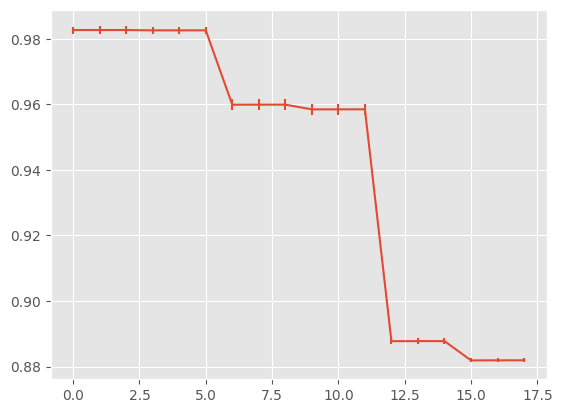

In [560]:
mean_score = grid_search.cv_results_['mean_test_score']
std_score = grid_search.cv_results_['std_test_score']
x = np.arange(0, mean_score.size)

plt.errorbar(x, mean_score, yerr=std_score);

In [561]:
cv_tuned_pipeline = grid_search.best_estimator_

In [562]:
f1_score(
    y_train,
    cv_tuned_pipeline.predict(x_train)
)

0.7893978219090327

In [563]:
f1_score(
    y_val,
    cv_tuned_pipeline.predict(x_val)
)

0.7872509960159363

## Объединение признаков

In [715]:
pipeline = Pipeline([
    (
        'features', 
        ColumnTransformer([
            (
                'title', 
                TfidfVectorizer(
                    lowercase=True, ngram_range=(1, 2), token_pattern=TOKEN_PATTERN,
                    stop_words=stopwords, min_df=5, max_df=0.75
                ), 
                'title'
            ),
            (
                'body',
                CountVectorizer(
                    lowercase=True, ngram_range=(1, 1), token_pattern=TOKEN_PATTERN,
                    stop_words=stopwords, min_df=3, max_df=0.75
                ), 
                'body'
            )
        ])
    ),
    ('clf', SGDClassifier(random_state=SEED, alpha=0.01))
])

# Submit

In [367]:
docs_test = [tokenize(str(text)) for text in X_test]

In [368]:
lemmatized_docs_test = [[lemmatize(token) for token in text] for text in tqdm_notebook(docs_test)]

cleared_docs_test = [[token for token in text if token not in stopwords] for text in lemmatized_docs_test]

C:\Users\User\AppData\Local\Temp\ipykernel_20140\3722907070.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  lemmatized_docs_test = [[lemmatize(token) for token in text] for text in tqdm_notebook(docs_test)]


  0%|          | 0/165378 [00:00<?, ?it/s]

In [369]:
cleared_docs_test

[['шесть',
  'кассационный',
  'суд',
  'самар',
  'начать',
  'работа',
  'разный',
  'здание',
  'фото',
  'коммерсантъ'],
 ['индексация',
  'алименты',
  'случай',
  'производиться',
  'каков',
  'порядок',
  'правило',
  'процедура'],
 ['женщина', 'империя', 'мех', 'part'],
 ['небритый',
  'волосатый',
  'киска',
  'порно',
  'весь',
  'страна',
  'национальность',
  'онлайн'],
 [],
 ['вакансия',
  'мерчендайзер',
  'визитный',
  'рязань',
  'группа',
  'компания',
  'open',
  'поиск',
  'работа',
  'городработ',
  'ру'],
 ['смартфон',
  'apple',
  'iphone',
  'xr',
  'gb',
  'чёрный',
  'eu',
  'купить',
  'интернет',
  'магазин',
  'фотосклад',
  'ру',
  'цена',
  'отзыв',
  'видео',
  'обзор'],
 ['духов',
  'шкаф',
  'siemens',
  'hb',
  'gys',
  'r',
  'sim',
  'dealer',
  'цена',
  'москва'],
 ['вакансия',
  'аналитик',
  'департамент',
  'внедрение',
  'информационный',
  'система',
  'crm',
  'платформа'],
 ['anomaly', 'defenders', 'v', 'торрент'],
 ['убрать', 'запах', 'выгр

In [370]:
cleared_docs_test_sentence = [' '.join(text) for text in cleared_docs_test]

In [707]:
ans = count_model.predict(cleared_docs_test_sentence).astype(bool)

In [708]:
data = {'id': test_df['id'], 'target': ans}

In [709]:
pd_ans = pd.DataFrame(data=data)

In [710]:
pd_ans

,id,target
0,135309,False
1,135310,False
2,135311,False
3,135312,True
4,135313,False
...,...,...
165373,300682,False
165374,300683,False
165375,300684,False
165376,300685,False


In [711]:
pd_ans[["id", "target"]].to_csv("ml_baseline.csv", index=False)

In [712]:
pd_ans.shape

(165378, 2)